# Project description
---
**Context**

As the analyst at a big online store, together with the marketing department, we've compiled a list of hypotheses that may help boost revenue.

We need to prioritize these hypotheses, launch an A/B test, and analyze the results.


# Description of the data
---
**Data used in the first part of the project**

`/datasets/hypotheses_us.csv` [Download dataset](https://practicum-content.s3.us-west-1.amazonaws.com/datasets/hypotheses_us.csv)

- `Hypotheses` — brief descriptions of the hypotheses
- `Reach` — user reach, on a scale of one to ten
- `Impact` — impact on users, on a scale of one to ten
- `Confidence` — confidence in the hypothesis, on a scale of one to ten
- `Effort` — the resources required to test a hypothesis, on a scale of one to ten. The higher the `Effort` value, the more resource-intensive the test.

**Data used in the second part of the project**

`/datasets/orders_us.csv` [Download dataset](https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_us.csv)

- `transactionId` — order identifier
- `visitorId` — identifier of the user who placed the order
- `date` — of the order
- `revenue` — from the order
- `group` — the A/B test group that the user belongs to

`/datasets/visits_us.csv` [Download dataset](https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_us.csv)

- `date` — date
- `group` — A/B test group
- `visits` — the number of visits on the date specified in the A/B test group specified

Make sure to preprocess the data. There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B.

# Table of Contents

---
**Part 0. Preparing the data for analysis**
   * Data Preprocessing

**Part 1. Prioritizing Hypotheses**

The file `hypotheses_us.csv` contains nine hypotheses on boosting an online store's revenue with `Reach`, `Impact`, `Confidence`, and `Effort` specified for each.

**The task is:**

- Apply the `ICE` framework to prioritize hypotheses. Sort them in descending order of priority.
- Apply the `RICE` framework to prioritize hypotheses. Sort them in descending order of priority.
- Show how the prioritization of hypotheses changes when you use `RICE` instead of `ICE`. Provide an explanation for the changes.



**Part 2. A/B Test Analysis** 

You carried out an A/B test and got the results described in the files `orders_us.csv` and `visits_us.csv`.

**Task**: Analyze the A/B test:

1. Graph cumulative revenue by group. Make conclusions and conjectures.
2. Graph cumulative average order size by group. Make conclusions and conjectures.
3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
7. Plot a scatter chart of order prices. Make conclusions and conjectures.
8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
13. Make a decision based on the test results. The possible decisions are: 
    1. Stop the test, consider one of the groups the leader. 
    2. Stop the test, conclude that there is no difference between the groups. 
    3. Continue the test.


## Preparing the data for analysis | data preprocessing
---

In [1]:
import pandas as pd
import random
#import sidetable
import math as mt
import matplotlib
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats
from random import sample
from functools import reduce
from scipy import stats as st
from scipy.stats import levene
import matplotlib.pyplot as plt
from itertools import chain,cycle
from IPython.display import display_html
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    hypotheses = pd.read_csv('hypotheses_us.csv', sep = ';')
    orders = pd.read_csv('orders_us.csv')
    visits = pd.read_csv('visits_us.csv')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')    

<span style="color:purple">**Actions taken:** </span>

- Below we will review each dataset to get familiar with the information 

In [3]:
hypotheses.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypotheses.describe(include='all', datetime_is_numeric=True).fillna('N/A').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hypothesis,9,9,Change the background color on the main page. ...,1,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Reach,9.0,N/A,N/A,N/A,4.777778,3.153481,1.0,3.0,3.0,8.0,10.0
Impact,9.0,N/A,N/A,N/A,4.777778,3.192874,1.0,3.0,3.0,7.0,10.0
Confidence,9.0,N/A,N/A,N/A,5.555556,3.045944,1.0,3.0,7.0,8.0,9.0
Effort,9.0,N/A,N/A,N/A,4.888889,2.803767,1.0,3.0,5.0,6.0,10.0


In [5]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [6]:
orders.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
orders.describe(include='all', datetime_is_numeric=True).fillna('N/A').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transactionId,1197.0,N/A,N/A,N/A,2155621385.529657,1229084904.760058,1062393.0,1166775572.0,2145193898.0,3237740112.0,4293855558.0
visitorId,1197.0,N/A,N/A,N/A,2165960143.099415,1236014192.14687,5114589.0,1111826046.0,2217984702.0,3177606451.0,4283872382.0
date,1197,31,2019-08-05,48,N/A,N/A,N/A,N/A,N/A,N/A,N/A
revenue,1197.0,N/A,N/A,N/A,131.491646,603.004729,5.0,20.8,50.2,130.4,19920.4
group,1197,2,B,640,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
visits.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visits.describe(include='all', datetime_is_numeric=True).fillna('N/A').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,62,31,2019-08-29,2,N/A,N/A,N/A,N/A,N/A,N/A,N/A
group,62,2,B,31,N/A,N/A,N/A,N/A,N/A,N/A,N/A
visits,62.0,N/A,N/A,N/A,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


In [11]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<span style="color:green">**Notes from the analyst:** </span> 

- Overall, looks like the data is is good condition
- We will need to change the date columns to the correct data type

### Orders

- Changing all columns to lowercase for easier use
- Checking duplicated values
- Change `date` column to datetime
- Check if we have visitors in both A & B groups

In [12]:
#change to lowercase
orders.columns = orders.columns.str.lower() 
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [13]:
#check for duplicates
orders.duplicated().sum()

0

In [14]:
#change `date` column to datetime
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [15]:
# Check if we have visitors in both A & B groups
visitors_group = orders.groupby(['visitorid']).agg({'group': 'nunique'}).sort_values(by='group', ascending=False).query('group > 1').reset_index()
visitors_group.head()


,visitorid,group
0,2654030115,2
1,3891541246,2
2,3941795274,2
3,1404934699,2
4,351125977,2


In [16]:
visitors_group['visitorid'].nunique()

58

<span style="color:green">**Notes from the analyst:** </span> 

- We found out that we have 58 visitors that got into both A & B groups. 
- We will create a filtered df of orders without those found in both groups and checked again 

In [17]:
filtered_orders = orders[~orders.visitorid.isin(visitors_group['visitorid'])]


In [18]:
filtered_orders.groupby(['visitorid']).agg({'group': 'nunique'}).sort_values(by='group', ascending=False).query('group > 1').reset_index()

,visitorid,group


In [19]:
filtered_orders.info('deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


### Visits

- Changing all columns to lowercase for easier use
- Checking duplicated values -- none found
- Change `date` column to datetime


In [20]:
#change to lowercase
visits.columns = visits.columns.str.lower() 
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
#checking for duplicates
visits.duplicated().sum()

0

In [22]:
#change `date` column to datetime
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')
visits.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<h3 style="color:orange">Conlcusions:</h3> 

On this section of preprocessing the data we did:

* Lowercase column names of both `visits` & `orders` datasets
* Checking for duplicates in both, none found
* Change datatype to datetime in both datasets
* Creation of a new filtered df (`filtered_orders`) where we removed those visitors found in both A & B groups, lowering the size of it from 1197 to 1016



## Prioritizing Hypotheses
---

The file `hypotheses_us.csv` contains nine hypotheses on boosting an online store's revenue with `Reach`, `Impact`, `Confidence`, and `Effort` specified for each.

**The task is:**

- Apply the `ICE` framework to prioritize hypotheses. Sort them in descending order of priority.
- Apply the `RICE` framework to prioritize hypotheses. Sort them in descending order of priority.
- Show how the prioritization of hypotheses changes when you use `RICE` instead of `ICE`. Provide an explanation for the changes.

In [23]:
#Checking the hypotheses given
pd.set_option('display.max_colwidth', None)
hypotheses.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


### ICE Priority

**ICE has three components:**
   * **Impact** — how strongly this update will affect the users, their experience, and their satisfaction with the product;
   * **Confidence** — how sure you are that your product will affect them in this way;
   * **Effort/Ease** — how much will it cost to test the hypothesis.

ICE is calculated by multiplying Impact by Confidence and dividing by Effort.

In [24]:
#Calculate ICE and create a new column to represent it
hypotheses['ICE'] = ((hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']).round(3)
hypotheses.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200


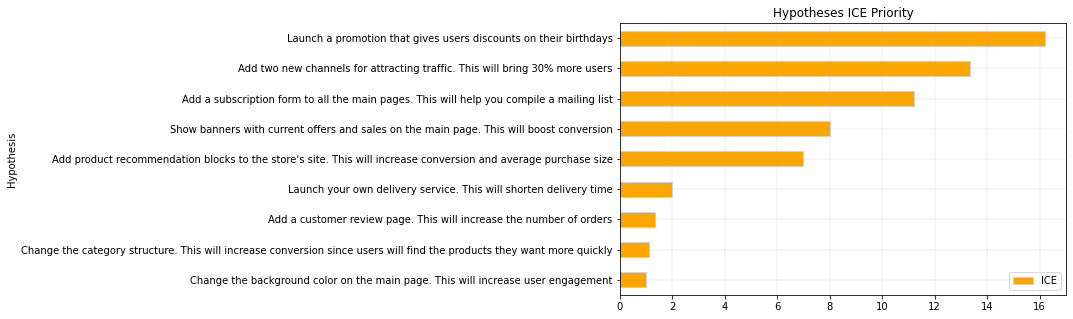

In [25]:
hypotheses[['Hypothesis','ICE']].sort_values(by='ICE').plot(
    x='Hypothesis',
    y='ICE', 
    kind='barh',
    figsize=(8,5),
    title='Hypotheses ICE Priority', 
    color='orange', 
    edgecolor = "lightgray")
plt.grid(linewidth = 0.2)
plt.show()

<span style="color:green">**Notes from the analyst:** </span> 

**Hypothesis with highest ICE:**
* **Hypothesis 8:** *Launch a promotion that gives users discounts on their birthdays*
* followed by **H0:** *Add two new channels for attracting traffic. This will bring 30% more users*
* and **H7:** *Add a subscription form to all the main pages. This will help you compile a mailing list*



**Hypothesis with lowest ICE:**
* **H5:** *Add a customer review page. This will increase the number of orders*
* **H3:** *Change the category structure. This will increase conversion since users will find the products they want more quickly*
* **H4:** *Change the background color on the main page. This will increase user engagement*



### RICE Priority

**RICE has four components:**
   * **Reach** — how many users will be affected by the update you want to introduce
   * **Impact** — how strongly this update will affect the users, their experience, and their satisfaction with the product
   * **Confidence** — how sure you are that your product will affect them in this way
   * **Effort** — how much will it cost to test the hypothesis
   
RICE is calculated by multiplying Reach and Impact by Confidence and dividing by Effort.




In [26]:
#Calculate RICE and adding a new column to our `hypotheses` df
hypotheses['RICE'] = (hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']
hypotheses.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200,16.2


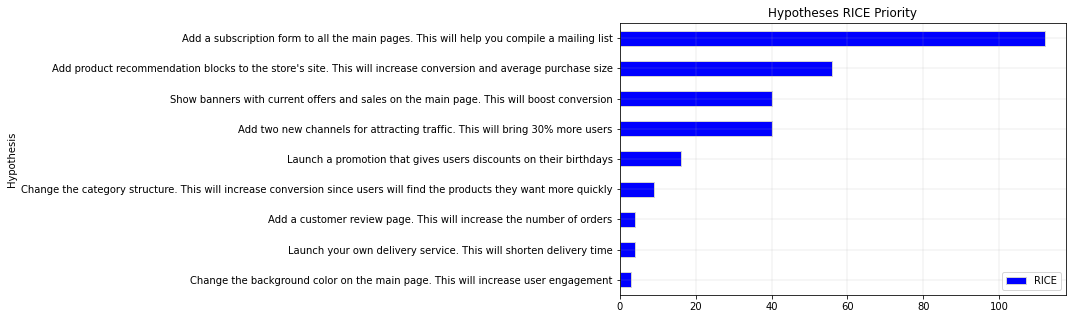

In [27]:
hypotheses[['Hypothesis','RICE']].sort_values(by='RICE').plot(
    x='Hypothesis',
    y='RICE', 
    kind='barh',
    figsize=(8,5),
    title='Hypotheses RICE Priority', 
    color='blue', 
    edgecolor = "lightgray")
plt.grid(linewidth = 0.2)
plt.show();

<span style="color:green">**Notes from the analyst:** </span> 

**Hypothesis with highest RICE:**
* **H7:** *Add a subscription form to all the main pages. This will help you compile a mailing list*
* **H2:** *Add product recommendation blocks to the store's site. This will increase conversion and average purchase size*	
* **H6:** *Show banners with current offers and sales on the main page. This will boost conversion*



**Hypothesis with lowest RICE:**
* **H5:** *Add a customer review page. This will increase the number of orders*
* **H1:** *Launch your own delivery service. This will shorten delivery time*
* **H4:** *Change the background color on the main page. This will increase user engagement*


### Comparison ICE and RICE Priorities



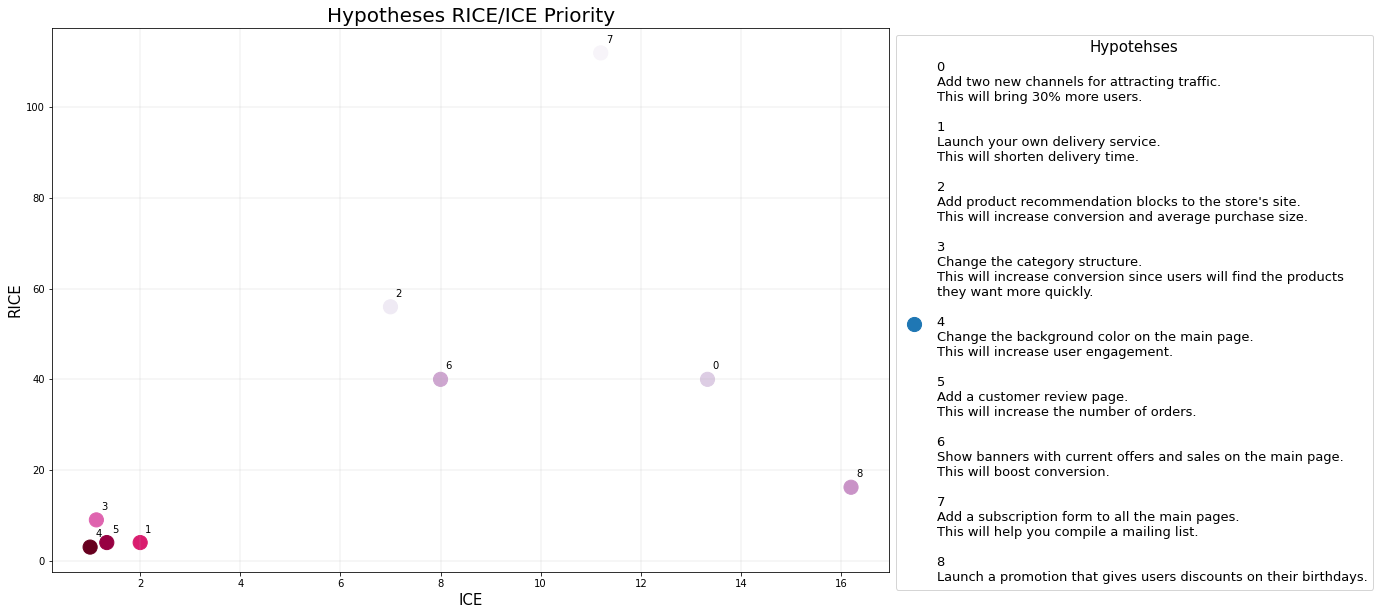

In [28]:

hypothesis_pivot = hypotheses.pivot_table(index = [hypotheses.index], values = ['ICE', 'RICE'], aggfunc = 'sum').sort_values(by='RICE', ascending=False)
plt.figure(figsize=(15, 10))
x = hypothesis_pivot.ICE
y = hypothesis_pivot.RICE
colors = np.array([10, 20, 40, 60, 70, 90, 120, 150, 170])
plt.scatter(x, y, c=colors,cmap='PuRd', marker='.', s=800)
labels = ["7", "2", "0", "6", "8", "3", "1", "5", "4"]

 
for x_pos, y_pos, label in zip(x, y, labels):
    plt.annotate(label, xy=(x_pos, y_pos), xytext=(5, 8), textcoords='offset points', ha='left', va='bottom')       


plt.title('Hypotheses RICE/ICE Priority', size=20)
plt.ylabel('RICE', size=15)
plt.xlabel('ICE', size=15)
plt.grid(linewidth = 0.2)
plt.legend(["""0  
Add two new channels for attracting traffic. 
This will bring 30% more users.

1 
Launch your own delivery service. 
This will shorten delivery time.

2 
Add product recommendation blocks to the store's site. 
This will increase conversion and average purchase size.

3 
Change the category structure. 
This will increase conversion since users will find the products 
they want more quickly.

4 
Change the background color on the main page. 
This will increase user engagement.

5 
Add a customer review page. 
This will increase the number of orders.

6  
Show banners with current offers and sales on the main page. 
This will boost conversion.

7 
Add a subscription form to all the main pages. 
This will help you compile a mailing list.

8 
Launch a promotion that gives users discounts on their birthdays."""], loc='best',bbox_to_anchor=(1,1), title="Hypotehses", fontsize=13, title_fontsize=15)
plt.show();

<h3 style="color:orange">Conlcusions:</h3> 

High:
* Hypothesis 8, 0 and 7 have the highest ICE
* Hypothesis 7, 2 and 6 have the highest RICE

Low:
* Hypothesis 5, 3, and 4 have the lowest ICE
* Hypothesis 5, 1, and 4 have the lowest RICE

Between these 2 parameters we have the **Reach** component. We can see that H7 *Add a subscription form to all the main pages. This will help you compile a mailing list* has high Reach value, so we can conclude it will reach all users that will subscribe. This hypothesis also has pretty good impact and confidence values and medium effort. 

H8 and H0 have low Reach values. H8 will have a reach for specific users and times and H0 will reach ~30% of users

H2 & H6 look for boost conversion rates. H6 has medium reach value, but high in confidence and low on effort. 
    


## A/B Test Analysis
---
We carried out an A/B test and got the results described in the files `orders_us.csv` and `visits_us.csv`.


### Graph cumulative revenue by group. Make conclusions and conjectures.


In [29]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [30]:
#date and group unique and dropping duplicates, datesgroup df
datesgroup = filtered_orders[['date','group']].drop_duplicates()
datesgroup.info('deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 1150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ KB


In [31]:
#orders_aggregated contains the sum of avg purchase sizes per date & group
orders_aggregated = datesgroup.apply(lambda x: filtered_orders
                            [np.logical_and(filtered_orders['date'] <= x['date'], filtered_orders
                            ['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' 
                            : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), 
                            axis=1).sort_values(by=['date','group'])
orders_aggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [32]:
#sum groups visits on each date
visits_aggregated = datesgroup.apply(lambda x: visits
                            [np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg
                            ({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visits_aggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [33]:
#mergin orders_aggregated and visits_aggregated. Add clarity to columns names
dates_cumulative = orders_aggregated.merge(visits_aggregated, left_on=
                                  ['date', 'group'], right_on=['date', 'group']).rename(columns=
                                  {'transactionid': 'orders', 'visitorid':'buyers'})
dates_cumulative.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [34]:
#cumulative for group A
cumulative_ra = dates_cumulative[dates_cumulative['group']=='A'][['date','revenue', 'orders']]
cumulative_ra.head()

,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99


In [35]:
#cumulative for group B
cumulative_rb = dates_cumulative[dates_cumulative['group']=='B'][['date','revenue', 'orders']]
cumulative_rb.head()

,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89


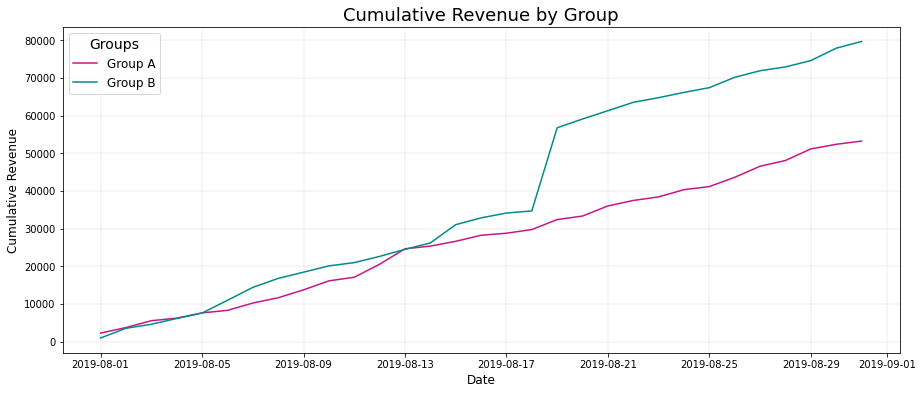

In [36]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(cumulative_ra['date'], cumulative_ra['revenue'], label='A', color='mediumvioletred')
plt.plot(cumulative_rb['date'], cumulative_rb['revenue'], label='B', color='darkcyan')

plt.title('Cumulative Revenue by Group', size=18)
plt.legend(['Group A','Group B'],loc='best', title="Groups", fontsize=12, title_fontsize=14)
plt.xlabel('Date', size=12)
plt.ylabel('Cumulative Revenue', size=12)
plt.grid(linewidth = 0.2)
plt.show();

<span style="color:green">**Notes from the analyst:** </span> 

   * Looking at the graph above, we see that group B has higher cumulative revenue than group A. Both groups' cumulative revenue rise constantly throughout the test but group B is the one with best results. The biggest peak we saw it in August 18th and after that it stabilizes back. This peak can be related to a big amount of orders around thar period
 

### Graph cumulative average order size by group. Make conclusions and conjectures.


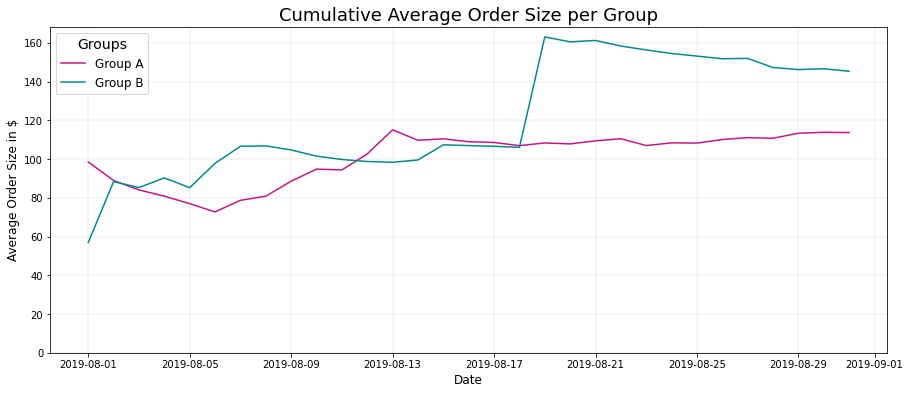

In [37]:
plt.figure(figsize=(15, 6))
plt.plot(cumulative_ra['date'], cumulative_ra['revenue']/cumulative_ra['orders'], label='A', color='mediumvioletred')
plt.plot(cumulative_rb['date'], cumulative_rb['revenue']/cumulative_rb['orders'], label='B', color='darkcyan')

plt.title('Cumulative Average Order Size per Group', size=18)
plt.legend(['Group A','Group B'],loc='best', title="Groups", fontsize=12, title_fontsize=14)
plt.ylabel('Average Order Size in $', size=12)
plt.xlabel('Date', size=12)
plt.grid(linewidth = 0.2)
plt.ylim(ymin=0)
plt.show();

<span style="color:green">**Notes from the analyst:** </span> 

   * Both groups A & B cumulataive average order sizes are not consistent along the test. Group A is a bit more stable, but group B has high peaks. 
   * The peak we can understand it comes from larger order sizes, more likely than large number of orders, but we will keep on investigating further 

### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.


In [38]:
#merging cumulative revenue from group A & B for easier comparison
merged_cumulative_r = cumulative_ra.merge(cumulative_rb, left_on='date', right_on='date', how='left', suffixes=['A', 'B']).rename(columns={'revenueA': 'revenue_a', 'revenueB':'revenue_b', 'ordersA':'orders_a', 'ordersB':'orders_b'})
merged_cumulative_r.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


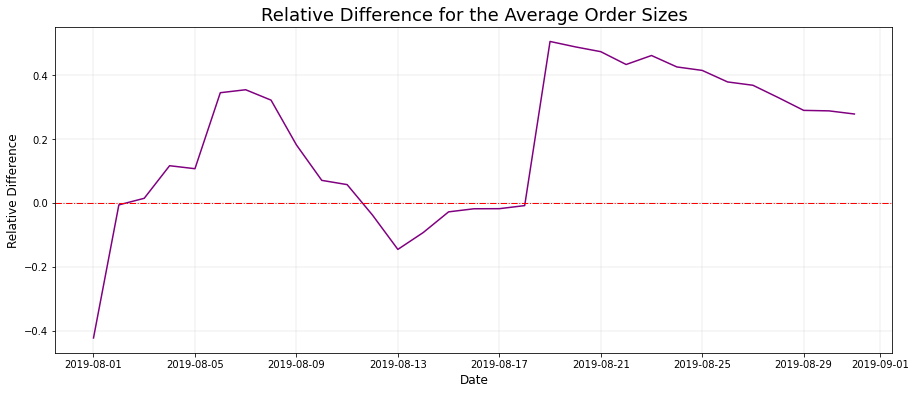

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(merged_cumulative_r['date'], (merged_cumulative_r['revenue_b']/merged_cumulative_r['orders_b'])/(merged_cumulative_r['revenue_a']/merged_cumulative_r
                                                                            ['orders_a'])-1, color='purple')
plt.title('Relative Difference for the Average Order Sizes', size=18)
plt.axhline(y=0, color='red', linestyle='-.', linewidth=1) 
plt.ylabel('Relative Difference', size=12)
plt.xlabel('Date', size=12)
plt.grid(linewidth = 0.2)
plt.show()

<span style="color:green">**Notes from the analyst:** </span> 

   * Relative difference = ((average B/average A) - 1)
   * August 7th to 18th holds the spikes, so we can conclude that around that time there were large orders made by group B, as we also noticed in previous graphs
   

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.


In [40]:
#calculate and add conversion to df
dates_cumulative['conversion'] = dates_cumulative['orders']/dates_cumulative['visits']
dates_cumulative.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [41]:
#conversion per day per group == A
da_cumulative = dates_cumulative[dates_cumulative['group']=='A']
da_cumulative.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837


In [42]:
#conversion per day per group == B
db_cumulative = dates_cumulative[dates_cumulative['group']=='B']
db_cumulative.head()

,date,group,orders,buyers,revenue,visits,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134


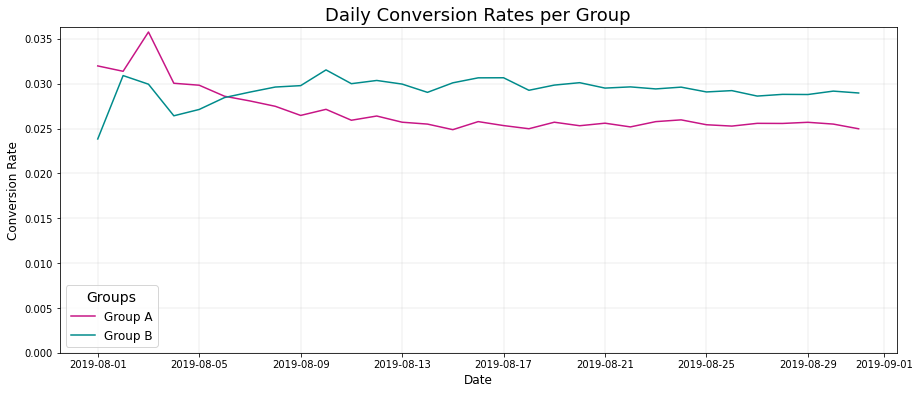

In [43]:
plt.figure(figsize=(15, 6))
plt.plot(da_cumulative['date'], da_cumulative['conversion'], label='A', color='mediumvioletred')
plt.plot(db_cumulative['date'], db_cumulative['conversion'], label='B', color='darkcyan')

plt.title('Daily Conversion Rates per Group', size=18)
plt.legend(['Group A','Group B'],loc='best', title="Groups", fontsize=12, title_fontsize=14)
plt.ylabel('Conversion Rate', size=12)
plt.xlabel('Date', size=12)
plt.ylim(ymin=0)
plt.grid(linewidth = 0.2)
plt.show();


<span style="color:green">**Notes from the analyst:** </span> 

   * Group A conversion rate is higher than B in the beginning. Short after Group A's conversion drops while Group's B rises and then stabilizes around end of August.
  

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.


In [44]:
#user_orders contain unique transactions per user
user_orders = (filtered_orders.drop(['group', 'revenue', 'date'], 
                                 axis=1).groupby('visitorid', as_index=False).agg
            ({'transactionid': pd.Series.nunique})).rename(columns={'visitorid': 'users', 
            'transactionid':'orders'}).sort_values(by='orders', ascending=False)
user_orders.head()

,users,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


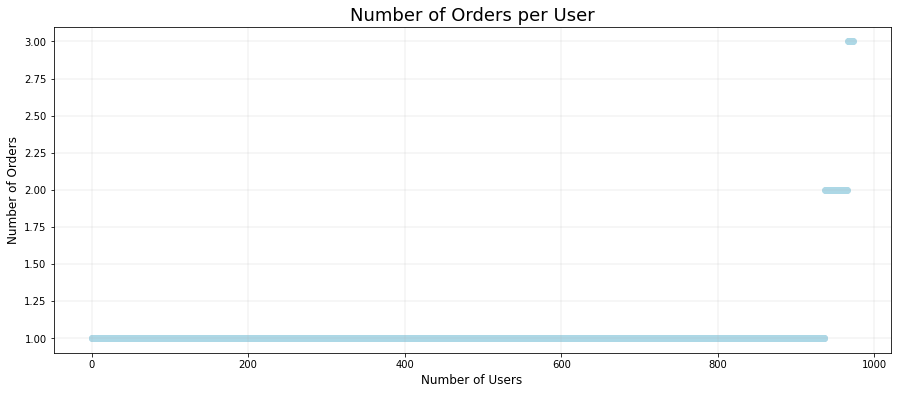

In [45]:
x_values = pd.Series(range(0,len(user_orders)))
plt.figure(figsize=(15, 6))
plt.scatter(x_values, user_orders['orders'].sort_values(ascending=True), color='lightblue')

plt.title('Number of Orders per User', size=18)
plt.ylabel('Number of Orders', size=12)
plt.xlabel('Number of Users', size=12)
plt.grid(linewidth = 0.2)
plt.show();


<span style="color:green">**Notes from the analyst:** </span> 

* We see very few users did more than one order during the test was running


### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.


In [46]:
#calculate percentile
np.percentile(user_orders['orders'], [95, 99])

array([1., 2.])

<span style="color:green">**Notes from the analyst:** </span> 

* The percentiles 95th and 99th for the number of oders per user helps us understand better. 
    * 95th percentile is 1 order
    * 99th percentile is 2 orders
    * Meaning, 5% of users placed more than 1 and only 1% placed more than 2 orders

### Plot a scatter chart of order prices. Make conclusions and conjectures.


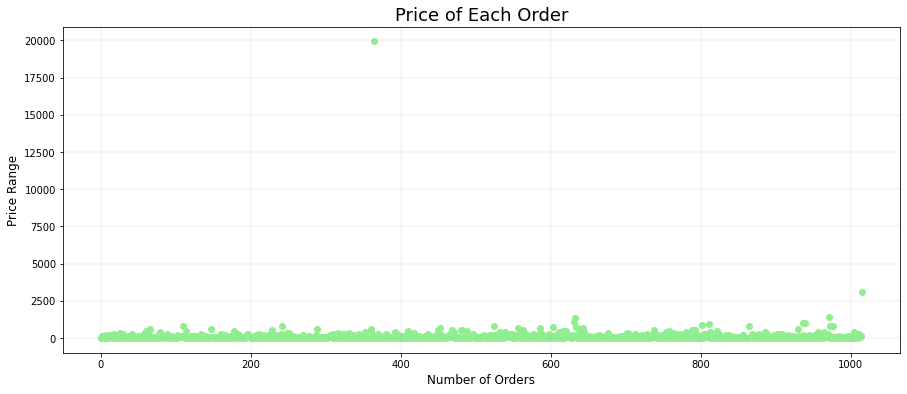

In [47]:
x_values = pd.Series(range(0, len(filtered_orders['revenue'])))
plt.figure(figsize=(15, 6))
plt.scatter(x_values, filtered_orders['revenue'], color='lightgreen')

plt.title('Price of Each Order', size=18)
plt.ylabel('Price Range', size=12)
plt.xlabel('Number of Orders', size=12)
plt.grid(linewidth = 0.2)
plt.show();

<span style="color:green">**Notes from the analyst:** </span> 

* We see some outliers in the graph above. Plotting below witho orders not higher than 2,500USD we can better understand the distribution:
    * Most  orders were priced at no more than 1,500USD
    * Couple of orders were priced higher and one (from the graph above) at 20,000USD which migh be a typo, considering the data we see here

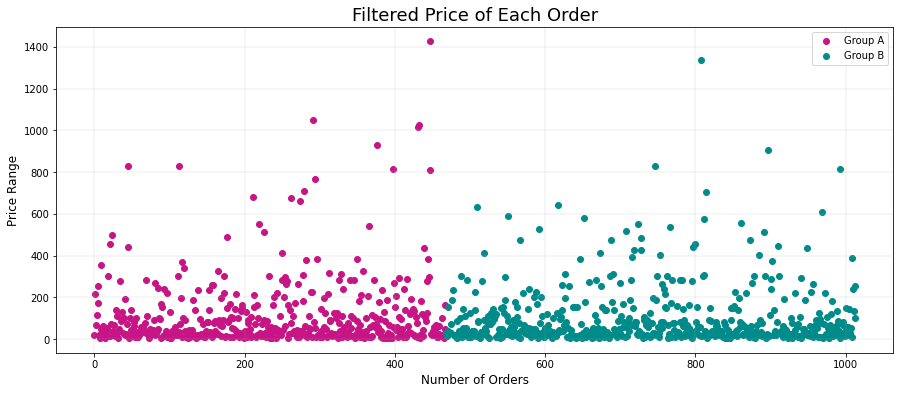

In [48]:
# filter orders and split into two groups
fil_rev_A = filtered_orders.query("group == 'A' and revenue < 2500")
fil_rev_B = filtered_orders.query("group == 'B' and revenue < 2500")

# create x values for each group
x_values_A = pd.Series(range(0, len(fil_rev_A['revenue'])))
x_values_B = pd.Series(range(len(fil_rev_A['revenue']), len(fil_rev_A['revenue']) + len(fil_rev_B['revenue'])))

# plot the two groups separately with different colors
plt.figure(figsize=(15, 6))
plt.scatter(x_values_A, fil_rev_A['revenue'], color='mediumvioletred', label='Group A')
plt.scatter(x_values_B, fil_rev_B['revenue'], color='darkcyan', label='Group B')

plt.title('Filtered Price of Each Order', size=18)
plt.ylabel('Price Range', size=12)
plt.xlabel('Number of Orders', size=12)
plt.grid(linewidth = 0.2)
plt.legend()
plt.show();



### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.


In [49]:
np.percentile(filtered_orders['revenue'], [95, 99])

array([414.275, 830.3  ])

<span style="color:green">**Notes from the analyst:** </span> 

   * 95th percentile is 414 USD per order
   * 99th percentile is 830 USD per order
   * Meaning, no more than 5% of the orders costs more than 414, and only 1% of the orders cost more than 830

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

* Test Null Null Hypothesis (H0) that group A's conversion rate is equal to that of group B in the raw data (i.e., including outliers and anomalies)
* If rejected, the Alternative Hypothesis (H1) will be that conversion rate for group A is NOT equal to group B


In [50]:
#statistical significance of difference in conversion group A:
orders_ua = filtered_orders[filtered_orders
                            ['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : 
                            pd.Series.nunique}).rename(columns={'visitorid': 'users', 'transactionid':'orders'})
orders_ua.head()

,users,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [51]:
#statistical significance of difference in conversion group B:
orders_ub = filtered_orders[filtered_orders
                            ['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : 
                            pd.Series.nunique}).rename(columns={'visitorid': 'users', 'transactionid':'orders'})
orders_ub.head()

,users,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [52]:
#sample of group A with the number of orders per user and 0 if no order was placed
sample_a = pd.concat([orders_ua['orders'],
                      pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() 
                      - len(orders_ua['orders'])), name='orders')],axis=0)
sample_a.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [53]:
#sample of group B with the number of orders per user and 0 if no order was placed
sample_b = pd.concat([orders_ub['orders'],
                      pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()
                      - len(orders_ub['orders'])), name='orders')],axis=0)
sample_b.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [54]:
alpha = 0.05

results = stats.mannwhitneyu(sample_a, sample_b)[1]

print('p-value: {:.3f}'.format(results))

if results < alpha:
    print("We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05")
else:

    print("We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05") 
print("The relative loss/gain of group B is {:.0f}%".format(((sample_b.mean()/sample_a.mean()-1))*100))

p-value: 0.011
We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05
The relative loss/gain of group B is 16%


<span style="color:green">**Notes from the analyst:** </span> 

   * With 0.05 significance level, the conversion rate of groups A and B is unequal.
   * Alpha (0.05) is higher than the p-value, meaning we reject the null hypothesis (H0). 
   * The relative gain of group B is 16%.

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

* Test Null Hypothesis (H0) that group A's average order size is equal to that of group B in the raw data (i.e., including outliers and anomalies).
* If rejected, the Alternative Hypothesis (H1) is that average order size of group A is NOT equal to that of group B.


In [55]:
alpha = 0.05

results = stats.mannwhitneyu(filtered_orders[filtered_orders['group']=='A']
                             ['revenue'], filtered_orders[filtered_orders['group']=='B']['revenue'])[1]

print('p-value: {0:.3f}'.format(results))

if results < alpha:
    print("We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05")
else:
    print("We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05") 
print("The relative loss/gain of group B is {0:.1f}%".format((filtered_orders[filtered_orders['group']=='B']['revenue'].mean()/filtered_orders[filtered_orders['group']=='A']['revenue'].mean()-1)*100))
   
    

p-value: 0.862
We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05
The relative loss/gain of group B is 27.8%


<span style="color:green">**Notes from the analyst:** </span> 

   * With 0.05 significance level, the average order size of groups A and B is equal.
   * p-value is higher than the alpha (0.05), meaning we can't reject the null hypothesis
   * Average order size of group B is much bigger than group A
   

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

* Null Hypothesis (H0) that group A's conversion rate is equal to that of group B in the filtered data (i.e., excluding outliers and anomalies).
* If rejected, the Alternative Hypothesis (H1) is that conversion rate of group A is NOT equal to that of group B.

In [56]:
#list of users with anomalies (more than 2 orders) in both groups
abnormal_u = pd.concat([pd.concat([orders_ua[orders_ua['orders'] > 2]['users'], 
                      orders_ub[orders_ub['orders'] > 2]['users']], axis = 0), filtered_orders[filtered_orders['revenue'] > 414.275]
                        ['visitorid']], axis = 0).drop_duplicates().sort_values()

In [57]:
alpha = 0.05

sample_af = pd.concat([orders_ua[np.logical_not(orders_ua['users'].isin(abnormal_u))]['orders'],
                       pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()
                                                    - len(orders_ua['orders'])),name='orders')],axis=0)

sample_bf = pd.concat([orders_ub[np.logical_not(orders_ub['users'].isin(abnormal_u))]['orders'],
                       pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()
                                                    - len(orders_ub['orders'])),name='orders')],axis=0)


results = stats.mannwhitneyu(sample_af, sample_bf)[1]

print('p-value: {0:.3f}'.format(results))

if results < alpha:
    print("We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05")
else:
    print("We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05") 
print("The relative loss/gain of group B is {0:.1f}%".format((sample_bf.mean()/sample_af.mean()-1)*100))

p-value: 0.012
We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05
The relative loss/gain of group B is 18.2%


<span style="color:green">**Notes from the analyst:** </span> 

   * With 0.05 significance level, the conversion rate of groups A and B is unequal.
   * Alpha (0.05) is higher than the p-value, meaning we reject the null hypothesis
   * The relative gain of group B is 18.2% - by removing the anomalies, the p-value is smaller but group B's relative gain grew.

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

* Test Null Hypothesis (H0) that group A's average order size is equal to that of group B in the filtered data (i.e., excluding outliers and anomalies).
* If rejected, the Alternative Hypothesis (H1) is that average order size of group A is NOT equal to that of group B.

In [58]:
alpha = 0.05

results = stats.mannwhitneyu(filtered_orders[np.logical_and(filtered_orders['group']=='A',np.logical_not(orders['visitorid'].isin(abnormal_u)))]['revenue'],filtered_orders[np.logical_and(filtered_orders['group']=='B',np.logical_not(filtered_orders['visitorid'].isin(abnormal_u)))]['revenue'])[1]

print('p-value: {:.3f}'.format(results))

if results < alpha:
    print("We reject the Null Hypothesis (H0) using significance level (alpha) of 0.05")
else:
    print("We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05") 
print("The relative loss/gain of group B is {:.1f}%".format((filtered_orders[np.logical_and(filtered_orders['group']=='B',np.logical_not(filtered_orders['visitorid'].isin(abnormal_u)))]['revenue'].mean()/filtered_orders[np.logical_and(filtered_orders['group']=='A',np.logical_not(filtered_orders['visitorid'].isin(abnormal_u)))]['revenue'].mean() - 1)*100))


p-value: 0.680
We can't reject the Null Hypothesis (H0) using significance level (alpha) of 0.05
The relative loss/gain of group B is -4.7%


<span style="color:green">**Notes from the analyst:** </span> 

* With 0.05 significance level, the average order size of groups A and B is equal.
* p-value is higher than the alpha (0.05), meaning we can't reject the null hypothesis
* Average size order of group B is smaller on 4.7% than group A's


### Make a decision based on the test results. 
    
<span style="color:green">**Notes from the analyst:** </span> 

   * Raw and filtered data show unequal conversion rate between groups
   * Group B results are better than group A, and even higher after removing anomalies

--- 
# Summary and final conclusions

**This test was based on 3 datasets:**
* `Hypotehis`
* `Orders`
* `Visits`


**As sumup, during the preprocessing of the data we:**

* Change to lowercase column names 
* Confirm no duplicates were found on `orders` nor `visits` df
* Convert `date` column to datetime datatype
* Found 58 users located in both test groups, so we created a new filtered data without those


**ICE/RICE:**

* Hypothesis with the highest **ICE** priority is hypothesis 8, next are 0 and 7, while the hypotheses with the lowest ICE priority are 5, 3 and 4.
* Hypothesis with the highest **RICE** priority is hypothesis 7, next are 2 and 6, while the hypotheses with the lowest RICE priority are 5, 1 and 4.


* Comparing both, we discovered:
    * Between these 2 parameters we have the Reach component. We can see that H7 Add a subscription form to all the main pages. This will help you compile a mailing list has high Reach value, so we can conclude it will reach all users that will subscribe. This hypothesis also has pretty good impact and confidence values and medium effort.

    * H8 and H0 have low Reach values. H8 will have a reach for specific users and times and H0 will reach ~30% of users

    * H2 & H6 look for boost conversion rates. H6 has medium reach value, but high in confidence and low on effort.

**A/B test Analysis:**

* Group A & B cumulative revenue rise constanly during the running of the test. Group B has a peak in revenue by August 18th
* Group A & B cumulative average order size are not constant during the test. Group A average is a bit more stable during end of August, while Group B declines slowly after the first peak
* The peaks we find them around August in both groups, this can indicate large orders placed by group B and also the presence of some outliers 
* Conversion rate of group A is higher than B's. After a bit both have a peak again and dropped around the same time, stabilizing them almost paralell but group B keeps higher at the end than A's.
* Number of orders:
    * The percentiles 95th and 99th for the number of oders per user helps us understand better.
    * 95th percentile is 1 order
    * 99th percentile is 2 orders
    * Meaning, 5% of users placed more than 1 and only 1% placed more than 2 orders
* Orders size:
   * 95th percentile is 414 USD per order
   * 99th percentile is 830 USD per order
   * Meaning, no more than 5% of the orders costs more than 414, and only 1% of the orders cost more than 830


**Decisions made based on the test results**

* Raw and filtered data shown uneven conversion rates between groups
* Conversion results for group B were better than group A. After removing anomalies, conversion for group B went even higher

We can stop the test and conclude group B as winner of it. 